# softmax_cross_entropy_with_logits

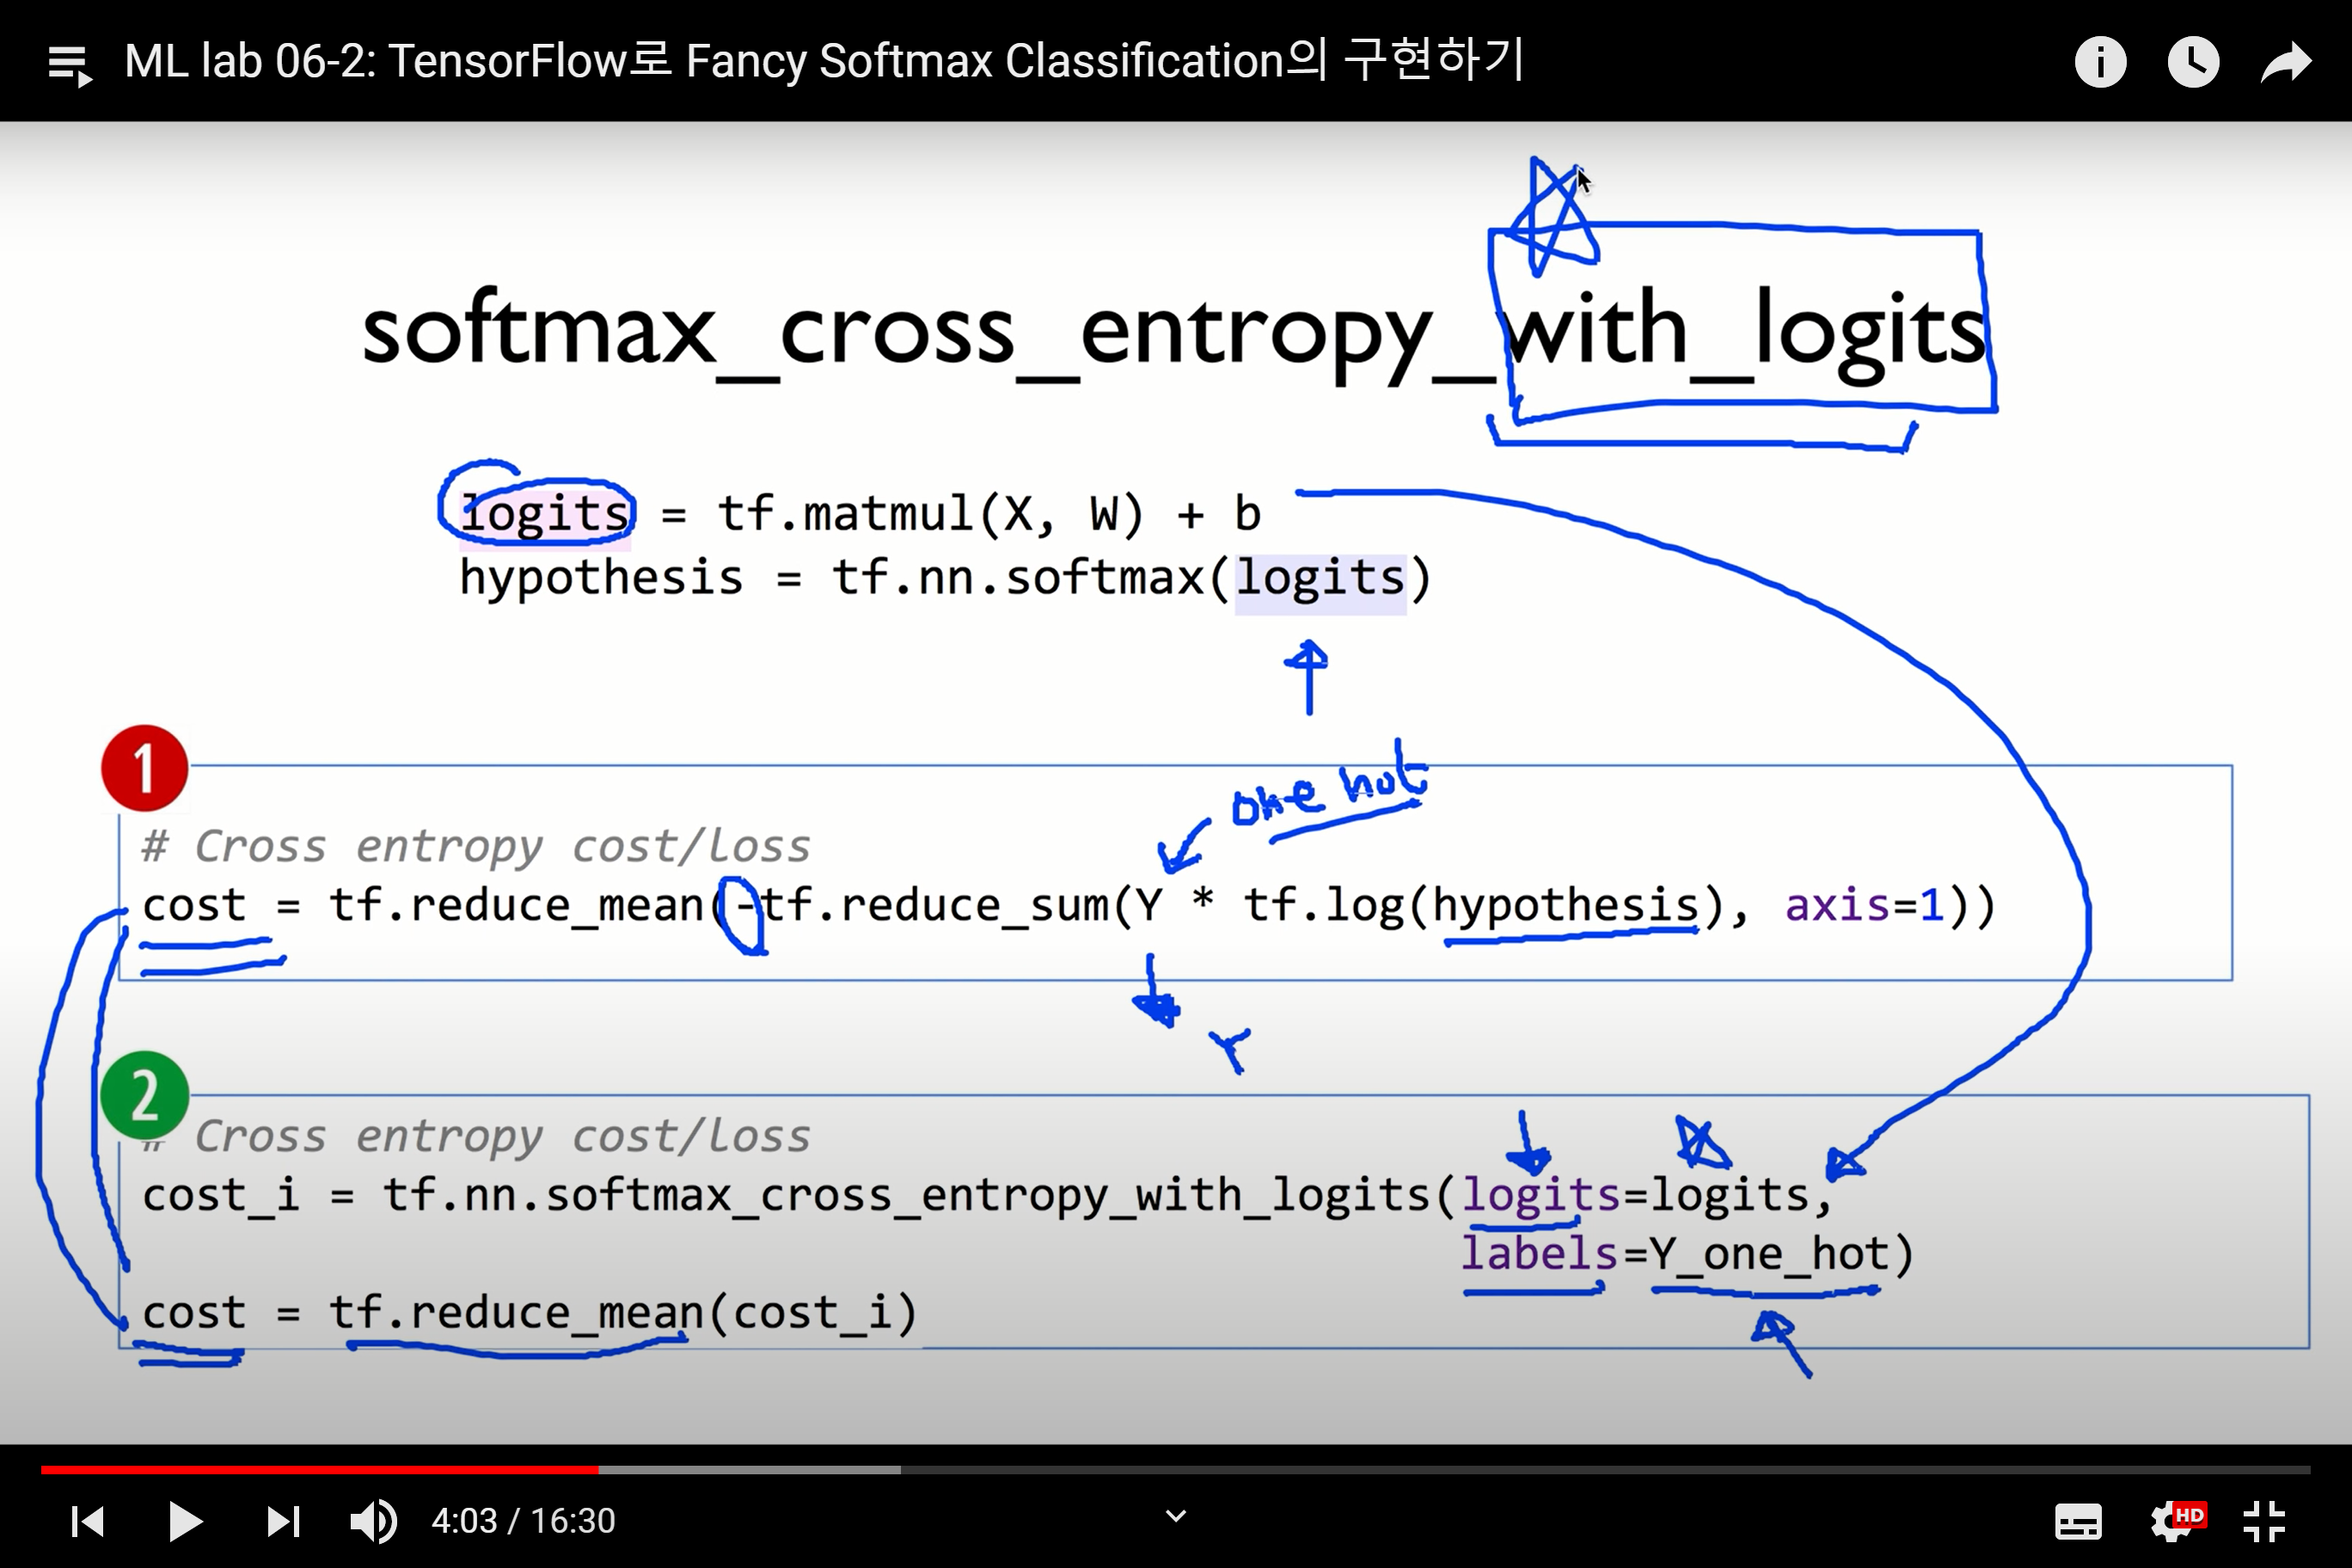

위에서 보면, 원래는 "logit (wx+b)을 sotfmax에 돌려서 one hot으로 나온것"(이걸 H라하자)을 갖고, H와 실제값(y)를 비교하여 (-ylogH의 합들의 평균)cost 함수를 구했는데, 

vs.

여기서는 logit(wx+b)를 sotmax_cross_entropy_with_logits이라는 함수에 돌려서->이게 wx+b를 하고, wx+b를 sotmax를 돌려서 나온 결과(H'라하자)H'와 실제값 y를 비교해서 -ylogH의 합들을 구한과정이다.

->그리고 이걸 갯수로 나눠주는 일만 한것.

# softmax_cross_entropy_with_logits함수를 쓸때 생기는 차원 문제와, 그것을 해결하는 방법

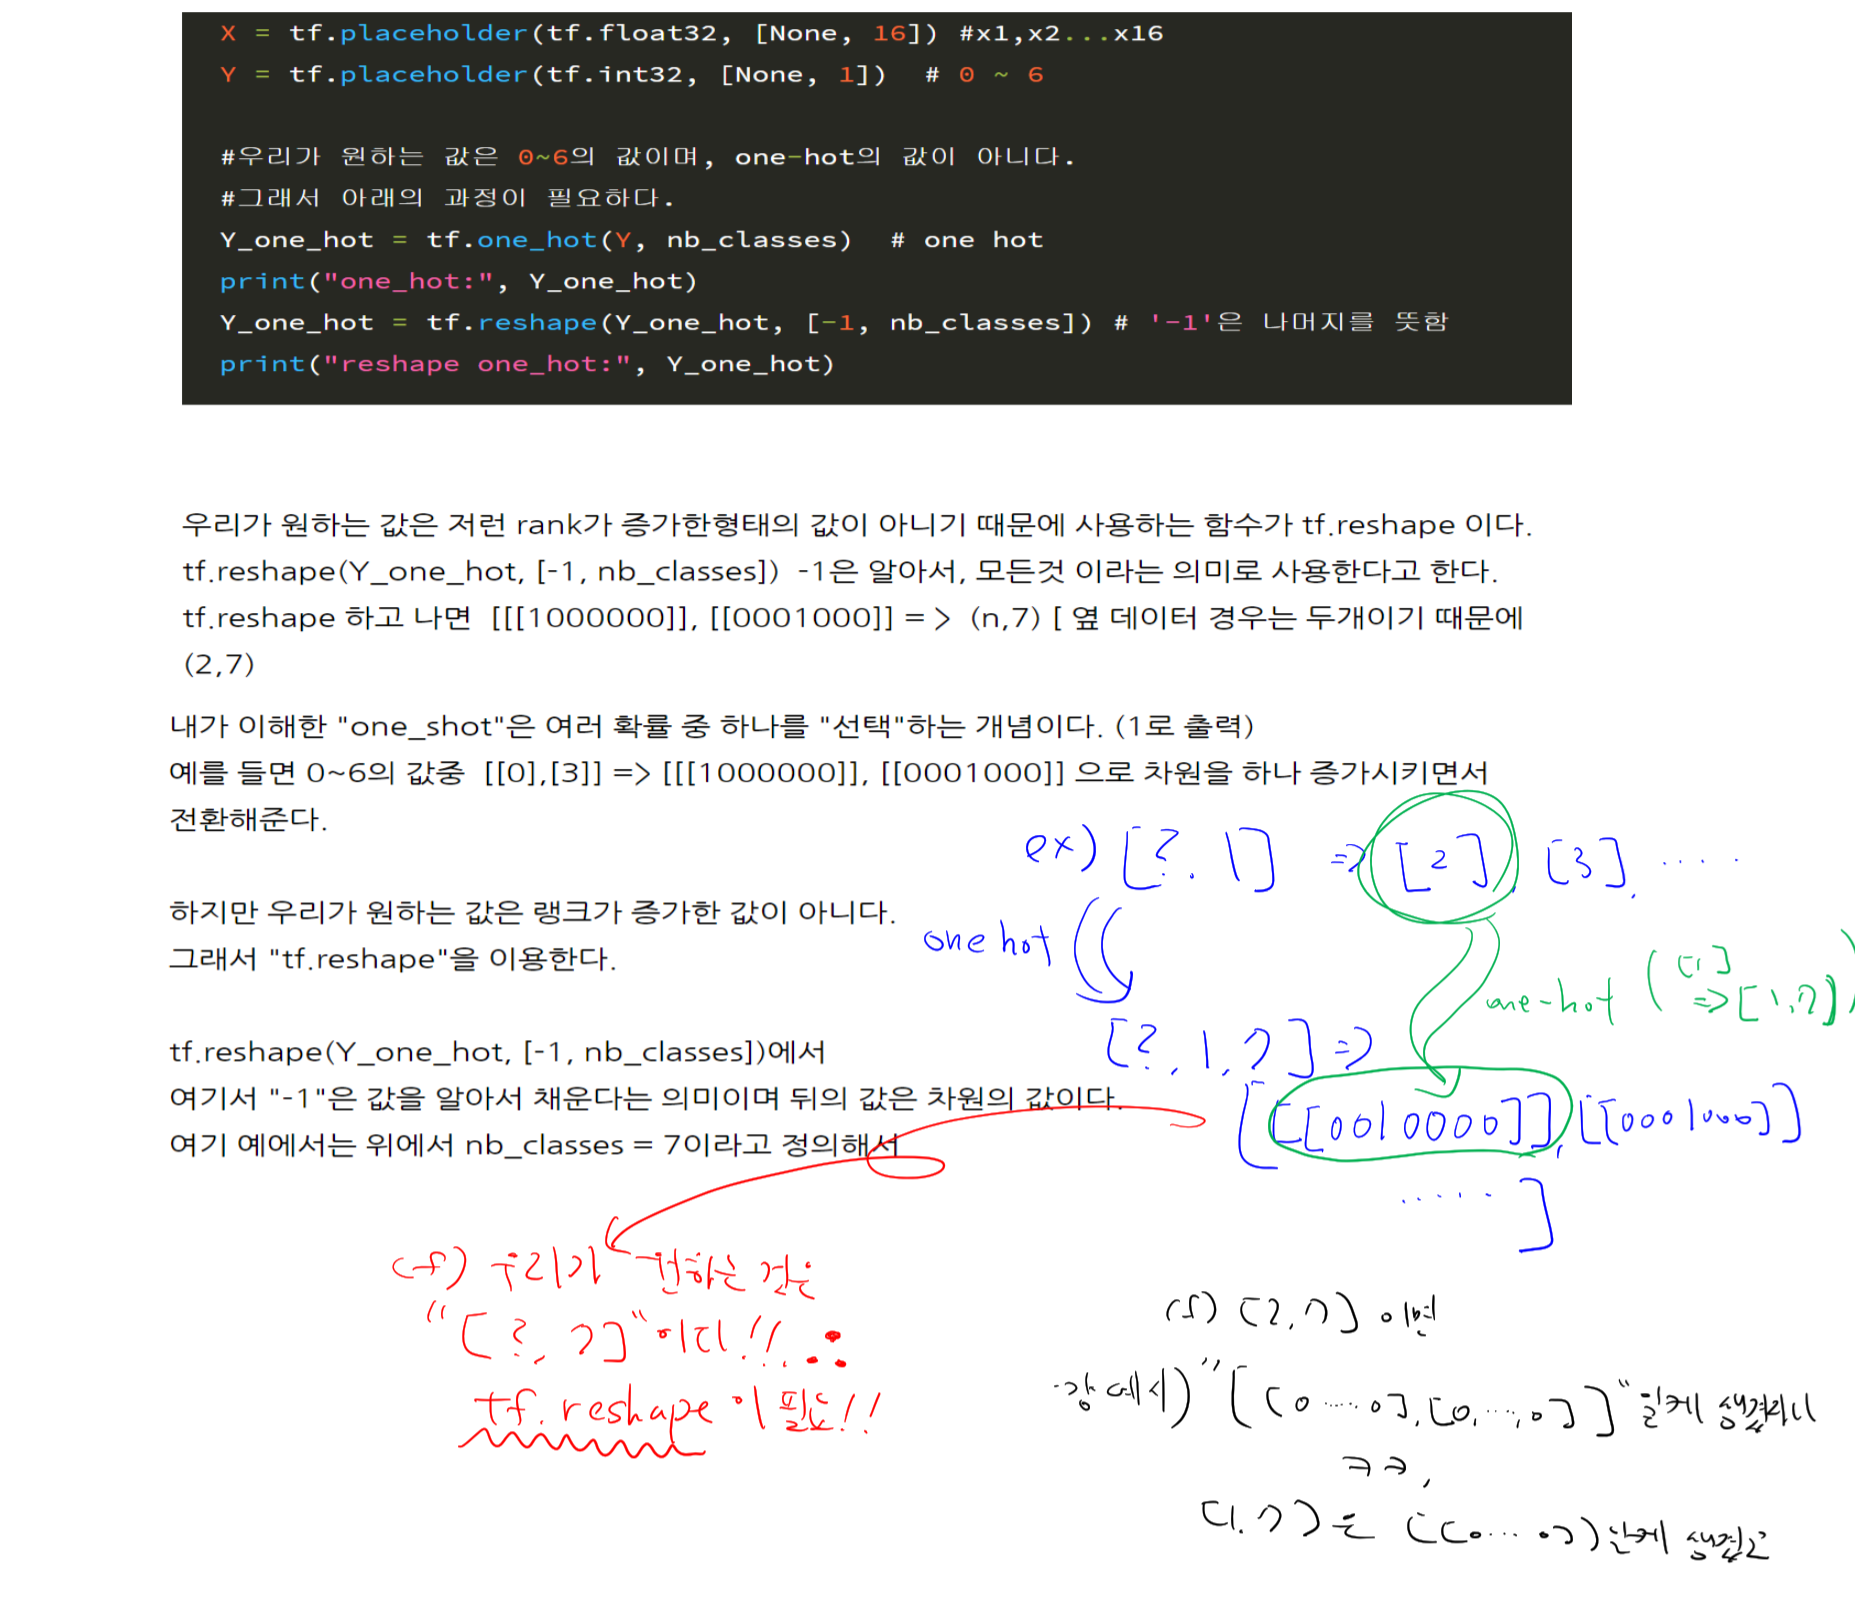

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np

In [3]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [4]:
nb_classes = 7 #0~6

In [5]:
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])#현재 Y는 one-hot 변수가 아님
#one-hot정보가 되도록 손 봐줄 필요가 있음

In [6]:
Y_one_hot = tf.one_hot(Y, nb_classes)#여기서 one-hot을 만들어줌 ex) 1이 였다면->0100000 로, 2였다면, ->0010000로
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])#bt 위에 마크다운처럼 문제가 있다, so, 지금 코드처럼 차원 처리를 해준다

In [7]:
W = tf.Variable(tf.random_normal([16, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

In [8]:
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

In [9]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = Y_one_hot)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [11]:
prediction = tf.argmax(hypothesis, 1)#이건 이전 softmax랑 똑같은데, hypothesis의 결과값(0~1)중 가장 큰것을 선택, 즉 0~6사이의 값이 나온다
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))#윗줄의 prediction의 Y_one_hot중 가장 큰값과 비교해서, 같은것을 모은다
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))#같은것들이 모아진것을 평균을 내면, 그게 정확도가 된다, 밑에 mardown 참고!!!

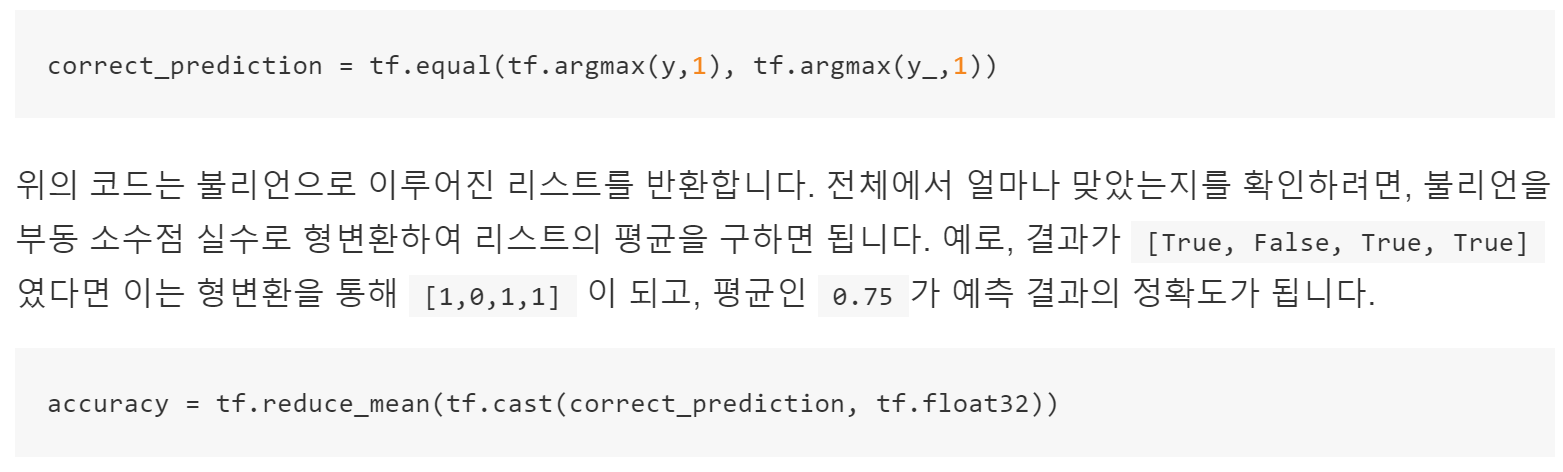

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2000):
        sess.run(optimizer, feed_dict = {X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X : x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    pred = sess.run(prediction, feed_dict={X: x_data})
    
for p, y in zip(pred, y_data.flatten()): #flatten()도 ex)[[1],[0]] -> [1,0]으로 바꿔줌
    print("[{}]Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

Step:     0	Loss: 3.808741	Acc: 17.82%
Step:   100	Loss: 0.579684	Acc: 85.15%
Step:   200	Loss: 0.368057	Acc: 90.10%
Step:   300	Loss: 0.277469	Acc: 93.07%
Step:   400	Loss: 0.224329	Acc: 95.05%
Step:   500	Loss: 0.188498	Acc: 96.04%
Step:   600	Loss: 0.162421	Acc: 96.04%
Step:   700	Loss: 0.142500	Acc: 96.04%
Step:   800	Loss: 0.126765	Acc: 98.02%
Step:   900	Loss: 0.114029	Acc: 99.01%
Step:  1000	Loss: 0.103525	Acc: 99.01%
Step:  1100	Loss: 0.094731	Acc: 99.01%
Step:  1200	Loss: 0.087273	Acc: 100.00%
Step:  1300	Loss: 0.080880	Acc: 100.00%
Step:  1400	Loss: 0.075345	Acc: 100.00%
Step:  1500	Loss: 0.070513	Acc: 100.00%
Step:  1600	Loss: 0.066261	Acc: 100.00%
Step:  1700	Loss: 0.062493	Acc: 100.00%
Step:  1800	Loss: 0.059133	Acc: 100.00%
Step:  1900	Loss: 0.056119	Acc: 100.00%
[True]Prediction: 0 True Y: 0
[True]Prediction: 0 True Y: 0
[True]Prediction: 3 True Y: 3
[True]Prediction: 0 True Y: 0
[True]Prediction: 0 True Y: 0
[True]Prediction: 0 True Y: 0
[True]Prediction: 0 True Y: 0
[T